# **Tech Companies Layoff Analysis**
## **by Mateus Lima Silva**

---

## 1. Importing required libraries

In [103]:
# Importing libraries
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt
import seaborn              as sns

## 2. Importing the dataset

In [104]:
# Default variables
df = pd.read_csv('../data/raw_tech_layoffs.csv', sep=',')
chart_colors = sns.color_palette('muted')

## 3. Configuring the environment

In [105]:
# Set the width of the display
pd.options.display.width = 1000

## 4. Exploring the dataset

In [106]:
# Getting 5 random rows to analyze the dataframe
df.sample(5)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
387,DoorDash,1250,6,11/30/2022,"Food delivery, ecommerce",San Francisco,Reuters,Public,NaN
290,FreshDirect,40,Unclear,8/25/2022,"Food delivery, ecommerce","The Bronx, NY",Philadelphia Business Journal,Private,NaN
457,Stitch Fix,Unclear,35,1/5/2023,"Ecommerce, Fashion",San Francisco,CNBC,Public,NaN
209,Hologram,80,33,6/9/2022,IoT,Chicago,Crain's Chicago Business,Private,NaN
169,Lokalise,76,23,11/16/2022,"Saas, APIs","Dover, DE",Lokalise founders,Private,NaN


In [107]:
# Dataframe size
total_rows = df.shape[0]
total_columns = df.shape[1]
print('This dataframe has {} rows and {} columns.'.format(total_rows, total_columns))

This dataframe has 489 rows and 9 columns.


In [108]:
# Checking the available columns and their types
df.dtypes

company                          object
total_layoffs                    object
impacted_workforce_percentage    object
reported_date                    object
industry                         object
headquarter_location             object
sources                          object
status                           object
additional_notes                 object
dtype: object

## 4.1 Exploring columns: **company**

In [109]:
# Counting unique companies in the dataset
unique_companies = df[['company']].nunique()[0]

print('There are {} unique companies in this dataset.'.format(unique_companies))

There are 477 unique companies in this dataset.


In [110]:
# 489 - 477 = 12 repeated rows = 2 or more layoffs from the same company registered
# Checking which companies repeat in the dataset
repeated_companies = df[df['company'].duplicated() == True][['company', 'industry']]
repeated_companies

,company,industry
69,Gemini,"Fintech, Crypto"
92,Thirty Madison,"health care, wellness"
185,Homeward,Proptech
188,DataRobot,"AI, enterprise software"
201,Socure,Identity verification
211,TruePill,"pharmaceutical, health care"
249,Argo AI,Transportation
300,On Deck,"Networking, business development"
342,Sundae,PropTech
451,Blend,"Fintech, proptech"


In [144]:
# Adding the "reported_date" for the repeated_companies dataframe
repeated_companies = df[['company', 'reported_date']].groupby(['company'])['reported_date'].apply(', '.join).reset_index()
repeated_companies = repeated_companies.merge(df[['company', 'industry']], on='company', how='left')
repeated_companies = repeated_companies[repeated_companies['reported_date'].str.contains(',')][['company', 'industry', 'reported_date']]
repeated_companies = repeated_companies.drop_duplicates('company').reset_index(drop=True)

repeated_companies.head(3)

,company,industry,reported_date
0,Argo AI,Transportation,"7/7/2022, 10/26/2022"
1,Blend,Fintech,"4/19/2022, 1/10/2023"
2,DataRobot,Artificial Intelligence,"8/8/2022, 8/23/2022"


In [10]:
# Printing the companies with two or more layoffs
print('Of the 489 lines, there are {} unique companies. {} of them have two or more layoffs registered.'.format(unique_companies, total_rows - unique_companies))
print('They are: \n{}'.format(repeated_companies))

Of the 489 lines, there are 477 unique companies. 12 of them have two or more layoffs registered.
They are: 
           company                              industry          reported_date
0          Argo AI                        Transportation   7/7/2022, 10/26/2022
1            Blend                               Fintech   4/19/2022, 1/10/2023
2        DataRobot               Artificial Intelligence    8/8/2022, 8/23/2022
3           Gemini                                Crypto    7/18/2022, 6/2/2022
4         Homeward                 Real Estate, PropTech  8/11/2022, 11/16/2022
5            Latch                  Smart Home, Security    5/13/2022, 8/2/2022
6          On Deck                  Business development     5/5/2022, 8/4/2022
7           Skillz                   Esports/Video Games   5/20/2022, 8/29/2022
8           Socure  cybsersecurity, predictive analytics     1/5/2023, 1/5/2023
9           Sundae                 PropTech, Real Estate   6/28/2022, 9/13/2022
10  Thirty 

In [145]:
# Creating column subtracting the difference in days for each layoff
repeated_companies['reported_date'] = repeated_companies['reported_date'].str.split(',')
repeated_companies['days_diff'] = repeated_companies['reported_date'].apply(lambda x: pd.to_datetime(x[1].strip(" "), format='%m/%d/%Y') - pd.to_datetime(x[0].strip(" "), format='%m/%d/%Y')).abs()

repeated_companies

,company,industry,reported_date,days_diff
0,Argo AI,Transportation,"[7/7/2022, 10/26/2022]",111 days
1,Blend,Fintech,"[4/19/2022, 1/10/2023]",266 days
2,DataRobot,Artificial Intelligence,"[8/8/2022, 8/23/2022]",15 days
3,Gemini,Crypto,"[7/18/2022, 6/2/2022]",46 days
4,Homeward,"Real Estate, PropTech","[8/11/2022, 11/16/2022]",97 days
5,Latch,"Smart Home, Security","[5/13/2022, 8/2/2022]",81 days
6,On Deck,Business development,"[5/5/2022, 8/4/2022]",91 days
7,Skillz,Esports/Video Games,"[5/20/2022, 8/29/2022]",101 days
8,Socure,"cybsersecurity, predictive analytics","[1/5/2023, 1/5/2023]",0 days
9,Sundae,"PropTech, Real Estate","[6/28/2022, 9/13/2022]",77 days


In [160]:
# Printing the average
avg_days_diff = repeated_companies['days_diff'].mean().days
std_days_diff = repeated_companies['days_diff'].std().days

print('The average days difference between the layoffs is {} days and standard deviation is {} days.\n'.format(avg_days_diff, std_days_diff))
print(repeated_companies['days_diff'].describe())

The average days difference between the layoffs is 91 days and standard deviation is 66 days.

count                            12
mean               91 days 08:00:00
std      66 days 03:04:56.641207633
min                 0 days 00:00:00
25%                69 days 06:00:00
50%                94 days 00:00:00
75%               103 days 12:00:00
max               266 days 00:00:00
Name: days_diff, dtype: object


In [11]:
# Creating a column to tag companies that have repeated layoffs
repeated_companies['repeated_layoffs'] = 'Multiple Layoffs'

# Tagging these companies in the 'df'
df = df.merge(repeated_companies[['company', 'repeated_layoffs']], on='company', how='left')
df['repeated_layoffs'] = df['repeated_layoffs'].fillna('Unique Layoffs')

# Checking if it worked (3 random companies)
df[(df['company'] == 'Homeward') | (df['company'] == 'On Deck') | (df['company'] == 'DataRobot') | (df['company'] == 'Meta')][['company', 'industry', 'repeated_layoffs']]

,company,industry,repeated_layoffs
32,DataRobot,Artificial Intelligence,Multiple Layoffs
141,Homeward,"Real Estate, PropTech",Multiple Layoffs
181,On Deck,Business development,Multiple Layoffs
185,Homeward,Proptech,Multiple Layoffs
188,DataRobot,"AI, enterprise software",Multiple Layoffs
300,On Deck,"Networking, business development",Multiple Layoffs
420,Meta,Social media,Unique Layoffs


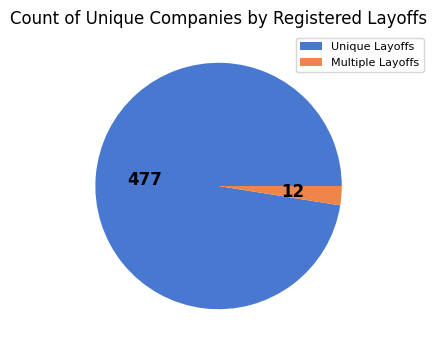

In [12]:
# Creating a pie chart to better visualize this difference
repeated_layoffs_count = df.drop_duplicates(['company'])[['repeated_layoffs']].value_counts()
repeated_layoffs_labels = df['repeated_layoffs'].unique()
repeated_layoffs_total = df['repeated_layoffs'].count()
repeated_layoffs_fig = plt.figure(figsize=(6, 4))

plt.pie(repeated_layoffs_count, colors=chart_colors, autopct=lambda x: '{:.0f}'.format(x * repeated_layoffs_total/100), textprops={'fontsize': 12, 'weight':'bold'})
plt.title('Count of Unique Companies by Registered Layoffs')
plt.legend(labels=repeated_layoffs_labels, fontsize=8, loc=(0.75, 0.87))
plt.show()

## 4.2 Exploring columns: **total_layoffs**

In [13]:
# Minimum and maximum "total_layoffs"
min_layoff = df['total_layoffs'].min()
max_layoff = df['total_layoffs'].max()

print('The minimum employees affected by layoff in this dataset is {} and the maximum is {}.'.format(min_layoff, max_layoff))

The minimum employees affected by layoff in this dataset is 10 and the maximum is Unclear.


In [14]:
# Checking which values are present in "total_layoffs" beside numbers
text_total_layoff = df[~df['total_layoffs'].str.isnumeric()]['total_layoffs'].unique()
text_total_layoff

array(['Unclear'], dtype=object)

In [15]:
# Saving the text output into the variable
text_total_layoff = text_total_layoff[0]

In [16]:
# Changing "total_columns" type to float
df['total_layoffs'] = pd.to_numeric(df['total_layoffs'], errors='coerce')

# Checking its minimum and maximum (considering only numbers)
min_layoff = df['total_layoffs'].min()
max_layoff = df['total_layoffs'].max()

print('The minimum employees affected by layoff in this dataset is {} and the maximum is {}.'.format(min_layoff, max_layoff))
print('Some rows have "{}" classification'.format(text_total_layoff))

The minimum employees affected by layoff in this dataset is 5.0 and the maximum is 18000.0.
Some rows have "Unclear" classification


In [17]:
# Creating categories for the employees affected
conditions_category_total_layoffs = [
    df['total_layoffs'] < 250,          # <250 employees
    df['total_layoffs'] < 500,          # >=250 & <500
    df['total_layoffs'] < 1000,         # >=500 & <1000
    df['total_layoffs'] < 5000,         # >=1000 & <5000
    df['total_layoffs'] < 10000,        # >=5000 & <10000
    df['total_layoffs'] >= 10000        # >=10000
]

options_category_total_layoffs = [
    '<250',
    '>=250 and <500',
    '>=500 and <1000',
    '>=1000 and <5000',
    '>=5000 and <10000',
    '>=10000'
]

df['category_total_layoffs'] = np.select(conditions_category_total_layoffs, options_category_total_layoffs, 'Undefined')

# Counting each of this category
category_total_layoffs_count = df['category_total_layoffs'].value_counts()

print('The count of companies for each category are:')
print(category_total_layoffs_count)

The count of companies for each category are:
<250                 241
Undefined            182
>=250 and <500        26
>=500 and <1000       18
>=1000 and <5000      16
>=10000                4
>=5000 and <10000      2
Name: category_total_layoffs, dtype: int64


[]

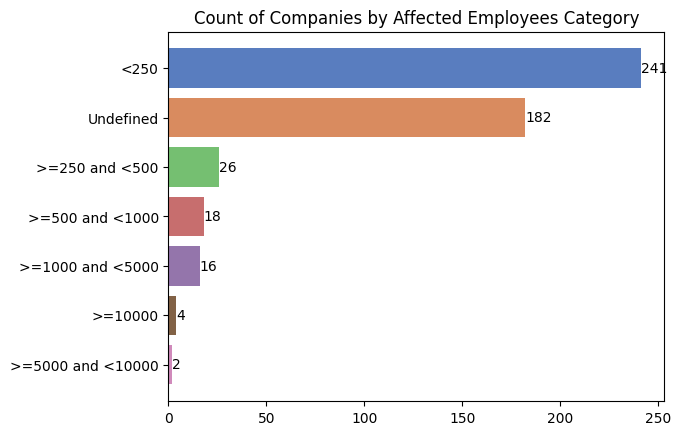

In [18]:
# Variables for the chart below
category_total_layoffs_values = category_total_layoffs_count.values
category_total_layoffs_labels = category_total_layoffs_count.index

# Creating a bar chart to better visualize the previous data
plt.title('Count of Companies by Affected Employees Category')
category_total_layoffs_ax = sns.barplot(df, x=category_total_layoffs_values, y=category_total_layoffs_labels, palette=chart_colors, orient='h')
category_total_layoffs_ax.bar_label(category_total_layoffs_ax.containers[0])
plt.plot()

## 4.3 Exploring columns: **impacted_workforce_percentage**

In [19]:
# Minimum and maximum "impacted_workforce_percentage"
min_workforce_percentage = df['impacted_workforce_percentage'].min()
max_workforce_percentage = df['impacted_workforce_percentage'].max()

print('The minimum workforce percentage affected by layoff in this dataset is {} and the maximum is {}.'.format(min_workforce_percentage, max_workforce_percentage))

The minimum workforce percentage affected by layoff in this dataset is 1 and the maximum is Unclear.


In [20]:
# Applying the same logic from "total_layoffs"
text_workforce_percentage = df[~df['impacted_workforce_percentage'].str.isnumeric()]['impacted_workforce_percentage'].unique()
text_workforce_percentage

array(['Unclear'], dtype=object)

In [21]:
# Saving the text
text_workforce_percentage = text_workforce_percentage[0]

# Changing the "impacted_workforce_percentage" type to date
df['impacted_workforce_percentage'] = pd.to_numeric(df['impacted_workforce_percentage'], errors='coerce')

# Checking its minimum and maximum values
min_workforce_percentage = df['impacted_workforce_percentage'].min()
max_workforce_percentage = df['impacted_workforce_percentage'].max()

print('The minimum impacted workforce percentage in this dataset is {} and the maximum is {}.'.format(min_workforce_percentage, max_workforce_percentage))
print('Some rows have "{}" classification'.format(text_workforce_percentage))

The minimum impacted workforce percentage in this dataset is 1.0 and the maximum is 100.0.
Some rows have "Unclear" classification


## 4.4 Exploring columns: **reported_date**

In [22]:
# Converting the "reported_date" column type to date
df['reported_date'] = pd.to_datetime(df['reported_date'], format='%m/%d/%Y', errors='coerce')

# Saving minimum and maximum values
min_reported_date = df['reported_date'].min()
max_reported_date = df['reported_date'].max()

print('The first reported date in this dataset is {} and the last one is {}'.format(min_reported_date, max_reported_date))

The first reported date in this dataset is 2022-01-27 00:00:00 and the last one is 2023-01-24 00:00:00


In [23]:
# Creating a column of first day of the month
monthly_df = df[['company', 'reported_date', 'total_layoffs']].copy()
monthly_df['first_day'] = monthly_df['reported_date'].to_numpy().astype('datetime64[M]')

monthly_df.sample(3)

,company,reported_date,total_layoffs,first_day
353,Spring,2022-07-13,NaN,2022-07-01
455,Playtika,2022-05-31,250.0,2022-05-01
133,Amount,2022-06-27,NaN,2022-06-01


In [24]:
# Counting rows with NaT values
nat_rows = monthly_df['reported_date'].isna().sum()
filled_rows = monthly_df['company'].count() - nat_rows

print('There are {} rows with no reported date and {} with reported dates registered'.format(nat_rows, filled_rows))

There are 0 rows with no reported date and 489 with reported dates registered


In [25]:
# Filtering only rows with "reported_date" and removing it
monthly_df = monthly_df[~monthly_df['reported_date'].isna()].sort_index()
del monthly_df['reported_date']

# Grouping by "first_day" and summing "total_layoffs"
monthly_df = monthly_df.groupby(by=['first_day'], as_index=False).agg({'company': 'count', 'total_layoffs':'sum'})

# Ordering by "first_day"
monthly_df = monthly_df.sort_values('first_day', ascending=True)
monthly_df.head(3)

,first_day,company,total_layoffs
0,2022-01-01,1,70.0
1,2022-02-01,2,168.0
2,2022-03-01,5,250.0


[]

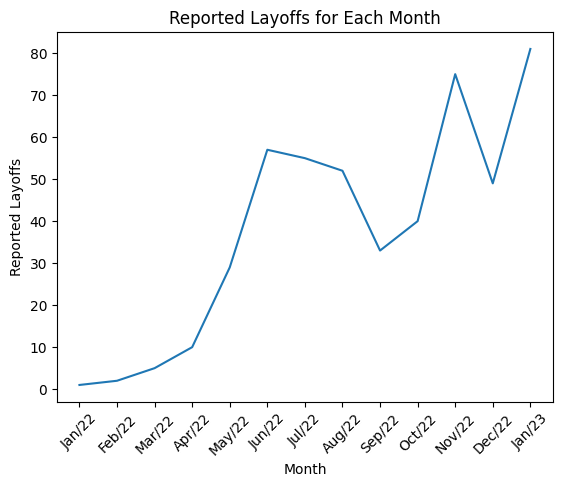

In [26]:
# Variables for the chart below
reported_date_label = monthly_df['first_day'].dt.strftime('%b/%y')

# Chart for registered layoffs for each month
plt.title('Reported Layoffs for Each Month')
reported_date_count_ax = sns.lineplot(monthly_df, x=reported_date_label, y='company')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Reported Layoffs')
plt.plot()

[]

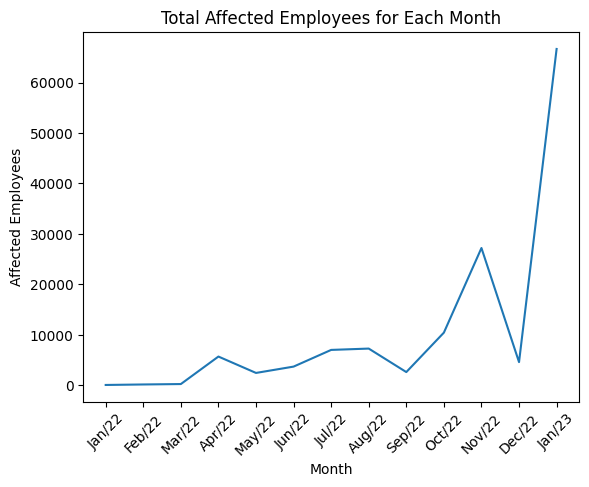

In [27]:
# Chart for total affected employees for each month
plt.title('Total Affected Employees for Each Month')
reported_date_total_ax = sns.lineplot(monthly_df, x=reported_date_label, y='total_layoffs')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Affected Employees')
plt.plot()

## 4.5 Exploring columns: **industry**

In [28]:
# Counting how many uniques industries are listed in the dataset
total_industries = df['industry'].nunique()

print('There is a total of {} different industries in this dataset. (wrong)'.format(total_industries))
print("Some rows have multiple values separated by comma. It's necessary to separate them before counting")
print(df['industry'].head(3))

There is a total of 289 different industries in this dataset. (wrong)
Some rows have multiple values separated by comma. It's necessary to separate them before counting
0        Fintech, payments
1    Advertising platforms
2          Saas, analytics
Name: industry, dtype: object


In [29]:
# Splitting each industry by comma and exploding it to separate rows
separated_industries = df['industry'].str.split(',', expand=True).stack().str.title().reset_index(drop=True)
separated_industries.name = 'industry'
separated_industries = pd.DataFrame(separated_industries)

# Capitalizing the industries on the main dataframe
df['industry'] = df['industry'].str.title()

separated_industries.head(5)

,industry
0,Fintech
1,Payments
2,Advertising Platforms
3,Saas
4,Analytics


In [30]:
# Summing and counting the total of layoffs for each "industry"
separated_industries['total_layoffs'] = separated_industries['industry'].apply(lambda x: df[df['industry'].apply(lambda y: x in y)]['total_layoffs'].sum())
separated_industries['count_layoffs'] = separated_industries['industry'].apply(lambda x: df[df['industry'].apply(lambda y: x in y)]['industry'].count())

separated_industries.head(3)

,industry,total_layoffs,count_layoffs
0,Fintech,11519.0,52
1,Payments,178.0,3
2,Advertising Platforms,0.0,1


In [31]:
# Validating if it worked
industry_name = 'Payments'
total_fintech = df[(df['industry'].str.contains(industry_name))]['total_layoffs'].sum()
count_fintech = df[(df['industry'].str.contains(industry_name))]['industry'].count()

print('There is a total of {} affected employees and a total of {} reported layoffs for the {} industry.'.format(total_fintech, count_fintech, industry_name))
df[(df['industry'].str.contains(industry_name))][['company', 'industry', 'total_layoffs']]


There is a total of 178.0 affected employees and a total of 3 reported layoffs for the Payments industry.


,company,industry,total_layoffs
0,C2FO,"Fintech, Payments",20.0
212,Happy Money,"Fintech, Payments",158.0
323,Autobooks,"Fintech, Payments",NaN


# CHECK WHY THERE IS DIFFERNECE BETWEEN SUM AND THE DATAFRAME

[]

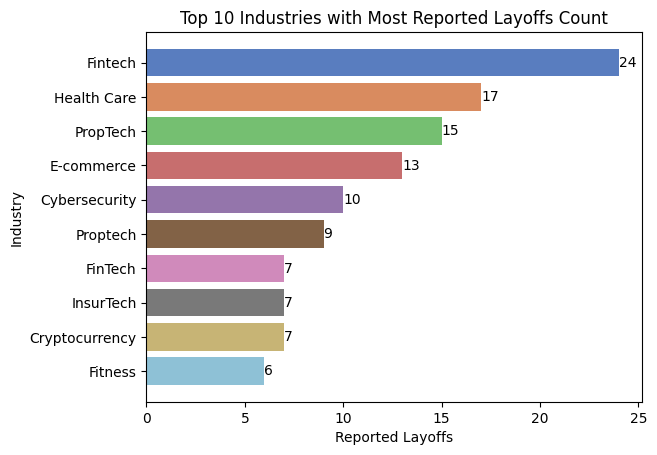

In [30]:
# Showing the 10 most repetitive industries
top_industries_most_values = df['industry'].value_counts().head(10).values
top_industries_most_labels = df['industry'].value_counts().head(10).index

plt.title('Top 10 Industries with Most Reported Layoffs Count')
top_industries_most_ax = sns.barplot(df, x=top_industries_most_values, y=top_industries_most_labels, palette=chart_colors, orient='h')
top_industries_most_ax.bar_label(top_industries_most_ax.containers[0])
plt.xlabel('Reported Layoffs')
plt.ylabel('Industry')
plt.plot()

In [31]:
# Showing the top 10 industries for affected employees
top_industries_affected = df[['industry', 'total_layoffs']].copy()

# Grouping and summing 'total_layoffs' for each industry
top_industries_affected = top_industries_affected.groupby('industry', as_index=False).sum()
top_industries_affected = top_industries_affected.sort_values('total_layoffs', ascending=False)

top_industries_affected

,industry,total_layoffs
67,"E-commerce, SaaS",18000.0
195,Social media,12420.0
25,"Big tech, internet services",12000.0
81,Enterprise Software,10945.0
91,Fintech,9811.0
...,...,...
122,"IT, software",0.0
121,"IT, future of work",0.0
120,IT Infrastructure,0.0
119,"Human resources, recruiting",0.0


[]

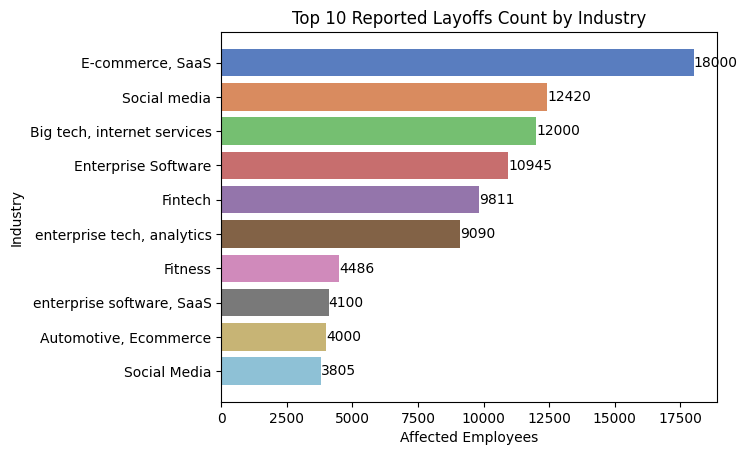

In [211]:
# Creating the chart
top_industries_affected_values = top_industries_affected['total_layoffs'].head(10)
top_industries_affected_labels = top_industries_affected['industry'].head(10)

plt.title('Top 10 Reported Layoffs Count by Industry')
top_industries_affected_ax = sns.barplot(df, x=top_industries_affected_values, y=top_industries_affected_labels, palette=chart_colors, orient='h')
top_industries_affected_ax.bar_label(top_industries_affected_ax.containers[0])
plt.xlabel('Affected Employees')
plt.ylabel('Industry')
plt.plot()

In [212]:
# Checking which companies are E-commerce and Social Media (high values on the chart above)
df[(df['industry'] == 'E-commerce, SaaS') | (df['industry'] == 'Social media')]

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes,repeated_layoffs,category_total_layoffs
126,Patreon,80.0,17.0,2022-09-13,Social media,San Francisco,The Information,Private,NaN,Unique Layoffs,<250
231,Parler,60.0,75.0,2023-01-10,Social media,"Nashville, TN",The Verge,Private,NaN,Unique Layoffs,<250
378,Amazon,18000.0,5.0,2023-01-05,"E-commerce, SaaS",Seattle,Wall Street Journal,Public,NaN,Unique Layoffs,>=10000
420,Meta,11000.0,13.0,2022-11-09,Social media,"Menlo Park, CA",CNBC,Public,NaN,Unique Layoffs,>=10000
437,Snap,1280.0,20.0,2022-08-31,Social media,"Venice, CA",The Verge,Public,NaN,Unique Layoffs,>=1000 and <5000


# NORMALIZE THE INDUSTRIES (UNIFY Social media AND Social Media FOR EXAMPLE)

## 4.6 Exploring columns: **headquarter_location**

----

### 💡 **Analysis 1) Check which companies had more and fewer layoff**

In [ ]:
# Converting columns to their correct type
tech_layoffs['total_layoffs'] = pd.to_numeric(tech_layoffs['total_layoffs'], errors='coerce')
tech_layoffs['impacted_workforce_percentage'] = pd.to_numeric(tech_layoffs['impacted_workforce_percentage'], errors='coerce')
tech_layoffs['reported_date'] = pd.to_datetime(tech_layoffs['reported_date'], format='%d/%M/%Y')

In [ ]:
tech_layoffs.sample(1)

In [ ]:
# Step 1: calculating the total employees for each company (that has "total_layoff" and "impacted_workforce_percentage" filled)
tech_layoffs['total_employees'] = ((tech_layoffs['total_layoffs'] / 100) / (tech_layoffs['impacted_workforce_percentage'] / 100)) * 100

# Step 2: rounding the "total_employees" value
tech_layoffs['total_employees'] = tech_layoffs['total_employees'].round(0)

tech_layoffs.sample(2)

In [ ]:
# Step 3: grouping by company name and removing rows with empty "total_layoffs" or "total_employees"
top_companies = tech_layoffs.groupby('company', as_index=False)[['total_layoffs', 'total_employees']].sum()

top_companies = top_companies[top_companies['total_layoffs'] > 0]
top_companies = top_companies[top_companies['total_employees'] > 0]

# Step 4: creating total layoff percentage (in case a company had layoff twice or more)
top_companies['total_layoff_percentage'] = ((top_companies['total_layoffs'] / top_companies['total_employees']) * 100).round(1)

top_companies.sample(3)

In [ ]:
# Step 5.1: categorizing the company size
company_size_conditions = [
    top_companies['total_employees'] < 100,      # <100 Employees => Small Company
    top_companies['total_employees'] < 500,      # >=100 & <500 Employees => Mid Company
    top_companies['total_employees'] < 2000,     # >=500 & <2000 Employees => Large Company
    top_companies['total_employees'] >= 2000     # >=2000 Employees => Big Tech
]

company_size_options = [
    'Small Company',
    'Mid Company',
    'Large Company',
    'Big Tech'
]

top_companies['company_size'] = np.select(company_size_conditions, company_size_options, 'Unidentified')

top_companies.sample(3)

In [ ]:
# Step 5.2: merging the "company_size" column to the main dataframe
tech_layoffs = pd.merge(top_companies[['company', 'company_size']], tech_layoffs, how='left', on='company')

tech_layoffs.sample(3)

----

In [ ]:
# Step 6.1: sorting by top 10 most "total_layoffs"
top_companies.sort_values('total_layoffs', ascending=False).head(5).reset_index(drop=True)

In [ ]:
# Analyzing 6.1: top 10 most "total_layoffs"
tech_layoffs[tech_layoffs['company'] == 'Amazon']

----

In [ ]:
# Step 6.2: sorting by top 10 fewer "total_layoffs"
top_companies.sort_values('total_layoffs', ascending=True).head(5).reset_index(drop=True)

In [ ]:
# Step 6.3: sorting by top 10 most "total_layoff_percentage" (important!)
top_companies.sort_values('total_layoff_percentage', ascending=False).head(10).reset_index(drop=True)

In [ ]:
# Step 6.4: sorting by top 10 fewer "total_layoff_percentage" (important!)
top_companies.sort_values('total_layoff_percentage', ascending=True).head(10).reset_index(drop=True)

----

contar quantas vezes a empresa fez layoff
isso é negativo pra ela se fez mais de 1 vez

## Analysis 2) Rank which industry had most layoff 

## Analysis 3)  

In [ ]:
# Exporting files to .csv to read in Power BI
tech_layoffs.to_csv('../data/tech_layoffs.csv')
top_companies.to_csv('../data/top_companies.csv')

# Conclusion
## Repeated Layoffs
In section *4.1 Exploring columns: company* it's possible to analyze which companies and industries had more than 1 reported layoffs registered in this dataset. In this case 